In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.request import urlopen
import json

%matplotlib inline

### Scraping Fangraphs for stats on:

1. Classic (AVG, HR, etc.)
2. Batted Ball (Fly Balls, Line Drives)
3. Plate Discipline (Pitches taken out of zone/in zone)
4. WAR

In [2]:
def std_fan_scrape(year):   
    site = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=8&season=' +year+'&month=0&season1='+year+'&ind=0'
    players = []
    url = urlopen(site).read()
    soup = BeautifulSoup(url, "html5lib")
    table = soup.find("table", {"class" : "rgMasterTable"}) 
    head = table.find('thead')
    body = table.find('tbody')
    headers = head.findAll(text=True)
    cols = headers[-23:-2]
    pages = int(headers[headers.index(' items in ') + 1])
    
    for page in range(1,pages+1):
        next_page = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=8&season=' +year+'&month=0&season1='+year+'&ind=0&page='+str(page)+'_30'
        url = urlopen(next_page).read()
        soup = BeautifulSoup(url, "html5lib")
        table = soup.find("table", {"class" : "rgMasterTable"}) 
        body = table.find('tbody')
        for row in body.findAll('tr'):
            player = row.findAll(text=True)[2:-1]
            player[8:10] = [x[:x.index(' %')] for x in player[8:10]]
            player[2:] = [float(x) for x in player[2:]]
            players.append(player)
    
    df = pd.DataFrame(players, columns = cols)
    df['OPS'] = df['OBP'] + df['SLG']
    
    return df

def bb_fan_scrape(year):
    site = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=2&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0'
    players = []
    url = urlopen(site).read()
    soup = BeautifulSoup(url, "html5lib")
    table = soup.find("table", {"class" : "rgMasterTable"}) 
    head = table.find('thead')
    body = table.find('tbody')
    headers = head.findAll(text=True)
    cols = headers[-21:-2]
    cols = [x.replace('%','_p').replace('/','_per_') for x in cols]
    pages = int(headers[headers.index(' items in ') + 1])
    
    for page in range(1,pages+1):
        next_page = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=2&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0&page='+str(page)+'_30'
        url = urlopen(next_page).read()
        soup = BeautifulSoup(url, "html5lib")
        table = soup.find("table", {"class" : "rgMasterTable"}) 
        body = table.find('tbody')
        for row in body.findAll('tr'):
            player = row.findAll(text=True)[2:-1]
            player[4:9] = [x[:x.index(' %')] for x in player[4:9]]
            player[10:11] = [x[:x.index(' %')] for x in player[10:11]]
            player[12:] = [x[:x.index(' %')] for x in player[12:]]
            player[2:] = [float(x) for x in player[2:]]
            players.append(player)
    
    df = pd.DataFrame(players, columns = cols)
    df.drop('Team', 1, inplace=True)
    df.drop('BABIP', 1, inplace=True)
    
    return df

In [3]:
def pd_fan_scrape(year):
    site = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=5&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0'
    players = []
    url = urlopen(site).read()
    soup = BeautifulSoup(url, "html5lib")
    table = soup.find("table", {"class" : "rgMasterTable"}) 
    head = table.find('thead')
    body = table.find('tbody')
    headers = head.findAll(text=True)
    cols = headers[-13:-2]
    cols = [x.replace('%','_p').replace('/','_per_') for x in cols]
    pages = int(headers[headers.index(' items in ') + 1])
    
    for page in range(1,pages+1):
        next_page = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=5&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0&page='+str(page)+'_30'
        url = urlopen(next_page).read()
        soup = BeautifulSoup(url, "html5lib")
        table = soup.find("table", {"class" : "rgMasterTable"}) 
        body = table.find('tbody')
        for row in body.findAll('tr'):
            player = row.findAll(text=True)[2:-1]
            player[2:] = [x[:x.index(' %')] for x in player[2:]]
            player[2:] = [float(x) for x in player[2:]]
            players.append(player)
    
    df = pd.DataFrame(players, columns = cols)
    df.drop('Team', 1, inplace=True)
    
    return df

In [4]:
bb_2017 = bb_fan_scrape('2017')
std_2017 = std_fan_scrape('2017')
pd_2017 = pd_fan_scrape('2017')
fan_2017 = pd.merge(pd.merge(std_2017,bb_2017,on='Name',how='left'), pd_2017, on='Name', how='left')
bb_2016 = bb_fan_scrape('2016')
std_2016 = std_fan_scrape('2016')
pd_2016 = pd_fan_scrape('2016')
fan_2016 = pd.merge(pd.merge(std_2016,bb_2016,on='Name',how='left'), pd_2016, on='Name', how='left')
bb_2015 = bb_fan_scrape('2015')
std_2015 = std_fan_scrape('2015')
pd_2015 = pd_fan_scrape('2015')
fan_2015 = pd.merge(pd.merge(std_2015,bb_2015,on='Name',how='left'), pd_2015, on='Name', how='left')
print(len(fan_2017))
print(len(fan_2016))
print(len(fan_2015))

166
146
141


### Scrape Statcast Leaderboard (Avg Velocity, Barrels)

In [5]:
def statcast_scrape(year):
    site = 'https://baseballsavant.mlb.com/statcast_leaderboard?year='+year+'&abs=30&player_type=resp_batter_id'
    url = urlopen(site).read()
    soup = BeautifulSoup(url, "html5lib")
    script = soup.find("body").find("script").get_text()
    leaderboard = script[script.index("leaderboard_data = ")+19:script.index('];')+1]
    leaderboard = json.loads(leaderboard)
    df = pd.DataFrame(leaderboard)
    df['Name'] = df['name']
    df = df[['Name', 'avg_hit_speed', 'barrels', 'brl_percent']]
    df['brl_percent'] = [x[:x.index('%')] for x in df['brl_percent']]
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    return df

cast_2017 = statcast_scrape('2017')
cast_2016 = statcast_scrape('2016')
cast_2015 = statcast_scrape('2015')

In [6]:
print(len(cast_2017))
print(len(cast_2016))
print(len(cast_2015))

437
549
555


In [7]:
cast_2017.head()

,Name,avg_hit_speed,barrels,brl_percent
0,Aaron Judge,96.2,49,25.5
1,Giancarlo Stanton,90.8,37,15.5
2,Mark Trumbo,90.8,19,7.1
3,Brad Miller,89.2,5,5.0
4,Adam Lind,92.2,10,9.8


In [8]:
combo_2017 = pd.merge(fan_2017, cast_2017, on='Name', how='left')
combo_2017.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,Swing_p,O-Contact_p,Z-Contact_p,Contact_p,Zone_p,F-Strike_p,SwStr_p,avg_hit_speed,barrels,brl_percent
0,Aaron Judge,Yankees,84.0,366.0,30.0,75.0,66.0,6.0,16.7,29.8,...,41.5,44.8,80.6,68.2,40.6,59.6,13.2,96.2,49.0,25.5
1,Jose Altuve,Astros,86.0,380.0,13.0,62.0,50.0,18.0,9.7,12.1,...,46.3,76.5,91.4,85.3,41.1,67.4,6.8,85.3,21.0,7.2
2,Mookie Betts,Red Sox,86.0,399.0,16.0,61.0,53.0,15.0,10.5,8.3,...,36.6,75.8,92.3,86.9,44.7,56.4,4.8,88.6,15.0,4.7
3,Anthony Rendon,Nationals,81.0,339.0,16.0,46.0,54.0,5.0,14.2,13.9,...,41.3,75.3,92.3,87.7,46.6,59.9,5.1,89.9,18.0,7.5
4,Paul Goldschmidt,Diamondbacks,88.0,381.0,20.0,73.0,67.0,13.0,15.0,20.2,...,43.3,66.5,80.2,76.0,45.4,59.3,10.4,92.2,32.0,13.3


### Old School Stats:

1. AVG
2. R
3. RBI
4. HR
4. SB

### Less Old School:

1. OBP
2. SLG
2. ISO
4. BB%
5. K%

### Today (since 2015):

1. Exit Velocity
2. Launch Angle
3. Barrels/PA

In [9]:
#plt.figure(figsize=(12,10))
#sns.pairplot(df_2016[df_2016.columns[2:]], size = 1.2, aspect=1.5)

In [10]:
angles_2017 = pd.read_csv('data/savant_data_2017.csv')
angles_2017.head()

/Users/dev/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (53,54,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-07-05,99.1,-1.9240,5.7334,Robinson Cano,429664,516969,field_out,hit_into_play,...,54.3318,0.157,0.143,0.0,1,0,0,2,85,5
1,CH,2017-07-05,85.4,-1.3003,5.9053,Brett Gardner,458731,532077,single,hit_into_play_no_out,...,54.5805,0.236,0.220,0.9,1,1,0,2,80,3
2,FF,2017-07-05,95.7,-0.8909,6.0146,Tyler Wade,642180,532077,field_out,hit_into_play,...,54.4622,0.089,0.084,0.0,1,0,0,2,79,4
3,FF,2017-07-05,97.6,-1.6927,5.9379,Danny Valencia,502143,516969,field_out,hit_into_play,...,54.2328,0.017,0.026,0.0,1,0,0,3,84,2
4,FF,2017-07-05,94.8,2.3835,5.9152,Todd Frazier,453943,448281,home_run,hit_into_play_score,...,54.5570,0.519,0.981,2.0,1,0,3,6,68,3


### Data on balls put in play for each year

Need for visualizing significance of angle/velocity

Also leaderboard does not include angle data

In [11]:
def hits_and_outs(year):
    df = pd.read_csv('data/savant_data_'+year+'.csv')
    df['Name'] = df['player_name']
    df['Result'] = [1 if x in ['single', 'double', 'triple', 'home_run'] else 0 for x in df['events']]
    df = df[['Name', 'launch_speed', 'launch_angle', 'Result']]
    df = df[df['launch_speed'] != 'null']
    df['launch_speed'] = df['launch_speed'].astype(float)
    df['launch_angle'] = df['launch_angle'].astype(float)
    return df

def plot_hits_outs(df):
    plt.style.use('fivethirtyeight')

    hits = df[df['Result'] == 1]
    outs = df[df['Result'] == 0]

    plt.figure(figsize=(15,10))
    plt.scatter(outs['launch_speed'], outs['launch_angle'], label='Launch Speed')
    plt.scatter(hits['launch_speed'], hits['launch_angle'], label='Launch Angle', color = 'red')
    plt.title('Hits and Outs based on Launch Speed vs. Launch Angle')
    plt.xlabel('Launch Speed (MPH)')
    plt.ylabel('Launch Angle (degrees)')
    
def angle_df(df):
    avg_angle = {}
    for player in list(df['Name'].unique()):
        player_ang = df['launch_angle'][df['Name']==player]
        if len(player_ang) > 50:
            avg_angle[player] = player_ang.mean()
    df = pd.DataFrame()
    df['Name'] = avg_angle.keys()
    df['avg_angle'] = avg_angle.values()
    return df

/Users/dev/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (53,54,75) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


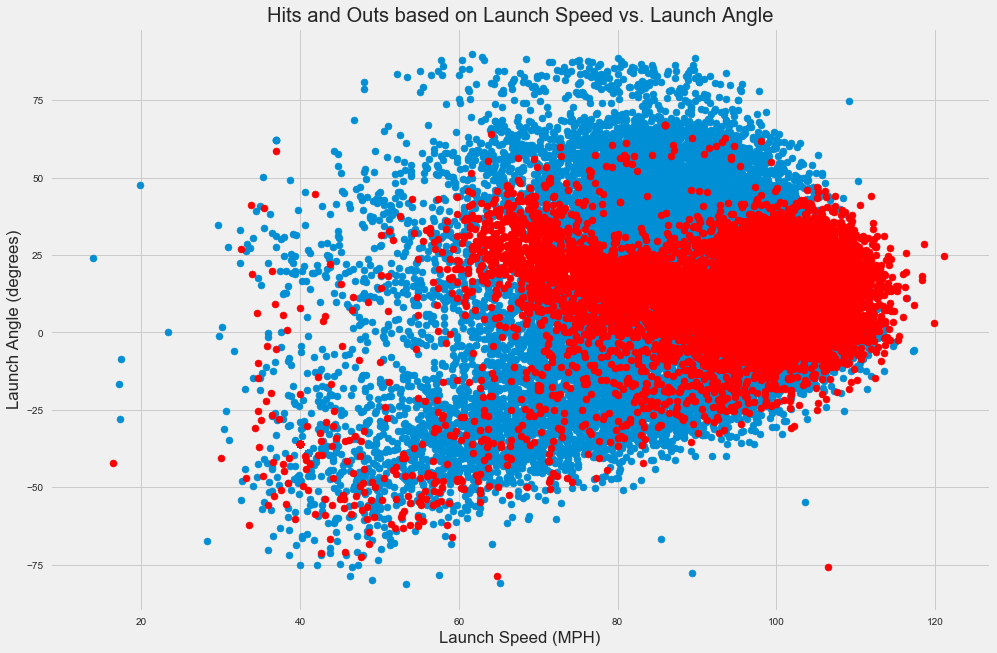

In [12]:
h_o_2017 = hits_and_outs('2017')
plot_hits_outs(h_o_2017)

In [13]:
angles_2017 = angle_df(h_o_2017)
angles_2017.head()

,Name,avg_angle
0,Robinson Cano,6.499867
1,Brett Gardner,13.553488
2,Danny Valencia,10.357816
3,Todd Frazier,21.441086
4,Jose Abreu,10.394070


In [16]:
df_2017 = pd.merge(combo_2017, angles_2017, on='Name', how='left')
df_2017.dropna(inplace=True)

In [17]:
fan_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 47 columns):
Name           146 non-null object
Team           146 non-null object
G              146 non-null float64
PA             146 non-null float64
HR             146 non-null float64
R              146 non-null float64
RBI            146 non-null float64
SB             146 non-null float64
BB%            146 non-null float64
K%             146 non-null float64
ISO            146 non-null float64
BABIP          146 non-null float64
AVG            146 non-null float64
OBP            146 non-null float64
SLG            146 non-null float64
wOBA           146 non-null float64
wRC+           146 non-null float64
BsR            146 non-null float64
Off            146 non-null float64
Def            146 non-null float64
WAR            146 non-null float64
OPS            146 non-null float64
GB_per_FB      146 non-null float64
LD_p           146 non-null float64
GB_p           146 non-null float

In [18]:
combo_2016 = pd.merge(fan_2016, cast_2016, on='Name', how='left')
h_o_2016 = hits_and_outs('2016')
angles_2016 = angle_df(h_o_2016)
df_2016 = pd.merge(combo_2016, angles_2016, on='Name', how='left')
df_2016.dropna(inplace=True)
df_2016.head()

/Users/dev/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (2,14,27,28,29,30,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,O-Contact_p,Z-Contact_p,Contact_p,Zone_p,F-Strike_p,SwStr_p,avg_hit_speed,barrels,brl_percent,avg_angle
0,Mike Trout,Angels,159.0,681.0,29.0,123.0,100.0,30.0,17.0,20.1,...,70.6,87.0,81.4,42.3,55.8,7.1,90.8,61,14.6,11.654219
1,Kris Bryant,Cubs,155.0,699.0,39.0,121.0,102.0,8.0,10.7,22.0,...,59.8,81.1,73.3,41.6,59.8,13.0,89.3,54,11.9,23.803787
2,Mookie Betts,Red Sox,158.0,730.0,31.0,122.0,113.0,26.0,6.7,11.0,...,71.6,94.8,87.3,47.6,60.8,5.2,89.6,31,5.2,16.929376
3,Josh Donaldson,Blue Jays,155.0,700.0,37.0,122.0,99.0,7.0,15.6,17.0,...,63.3,83.7,76.7,41.5,57.0,9.7,92.0,58,12.5,15.540617
4,Corey Seager,Dodgers,157.0,687.0,26.0,105.0,72.0,3.0,7.9,19.4,...,59.4,88.4,78.6,44.3,60.8,11.3,90.9,41,8.3,10.787186


In [19]:
combo_2015 = pd.merge(fan_2015, cast_2015, on='Name', how='left')
h_o_2015 = hits_and_outs('2015')
angles_2015 = angle_df(h_o_2015)
df_2015 = pd.merge(combo_2015, angles_2015, on='Name', how='left')
df_2015.dropna(inplace=True)
df_2015.head()

/Users/dev/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (2,14,27,28,29,30,50,51,53,54,75) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,O-Contact_p,Z-Contact_p,Contact_p,Zone_p,F-Strike_p,SwStr_p,avg_hit_speed,barrels,brl_percent,avg_angle
0,Bryce Harper,Nationals,153.0,654.0,42.0,118.0,99.0,6.0,19.0,20.0,...,60.9,84.4,75.4,38.0,54.6,10.8,91.0,51,12.9,11.845873
1,Mike Trout,Angels,159.0,682.0,41.0,104.0,90.0,11.0,13.5,23.2,...,66.3,87.7,80.0,44.0,56.7,7.5,92.8,69,16.4,14.693541
2,Josh Donaldson,Blue Jays,158.0,711.0,41.0,122.0,123.0,6.0,10.3,18.7,...,60.2,82.8,76.0,45.3,57.0,11.0,92.2,61,12.2,10.395637
3,Joey Votto,Reds,158.0,695.0,29.0,95.0,80.0,11.0,20.6,19.4,...,70.9,82.5,79.1,42.4,54.5,7.7,89.6,45,10.9,11.031590
4,Paul Goldschmidt,Diamondbacks,159.0,695.0,33.0,103.0,110.0,21.0,17.0,21.7,...,67.5,82.5,77.7,43.4,54.2,8.5,92.1,54,12.8,13.203560


In [20]:
df_15_16 = df_2016.append(df_2015)
df_15_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 140
Data columns (total 51 columns):
Name             285 non-null object
Team             285 non-null object
G                285 non-null float64
PA               285 non-null float64
HR               285 non-null float64
R                285 non-null float64
RBI              285 non-null float64
SB               285 non-null float64
BB%              285 non-null float64
K%               285 non-null float64
ISO              285 non-null float64
BABIP            285 non-null float64
AVG              285 non-null float64
OBP              285 non-null float64
SLG              285 non-null float64
wOBA             285 non-null float64
wRC+             285 non-null float64
BsR              285 non-null float64
Off              285 non-null float64
Def              285 non-null float64
WAR              285 non-null float64
OPS              285 non-null float64
GB_per_FB        285 non-null float64
LD_p             285 no

In [21]:
df_15_16.to_csv('data/bb_data_15_16.csv')

In [22]:
df_2017.to_csv('data/bb_data_17.csv')